In [1]:
import pandas as pd
import numpy as np

<Axes: xlabel='date'>

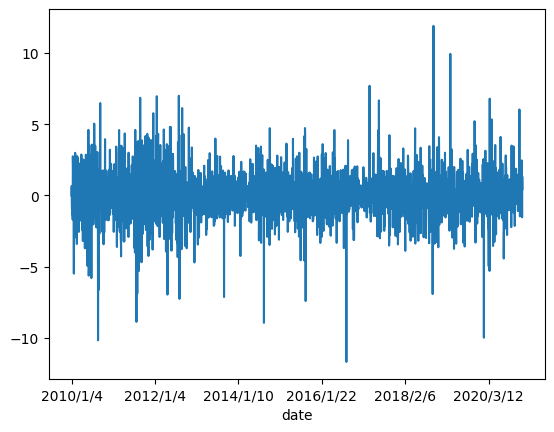

In [2]:
df = pd.read_csv("2317.csv")
df.isna().sum()
#%%
df.drop(['Change'], axis=1, inplace=True) #上期比
df.columns = ['date','Open','High','Low','Close','RD','Volume']
df
#%%
# 將日期設為index
df.set_index(['date'], inplace=True)
df
#%%
#應變量
df.RD.plot()

In [4]:
#%%
#先拆分，再正規化
train = df[0:2670]
test = df[2670:]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train), columns=df.columns)
test = pd.DataFrame(scaler.fit_transform(test), columns=df.columns)
#%%
#製造X跟Y(RD)
import tqdm
n = 30 #改n即可，資料1/4起，所以能預測的第一個Y為2/3，抓30天
feature_names = list(train.drop('RD', axis=1).columns)
X = []
y = []
indexes = []
norm_data_x = train[feature_names]
for i in tqdm.tqdm_notebook(range(0,len(train)-n)):
  X.append(norm_data_x.iloc[i:i+n]. values)
  y.append(train['RD'].iloc[i+n-1]) #現有資料+30天的Y
  indexes.append(train.index[i+n-1]) #Y的日期

print(X[0])
print(y[0])
#%%
X=np.array(X) # RD外的6個自變量，記憶體=30，EX:預測12/31的Y，用12/1~12/30的X
y=np.array(y)
print(X.shape)
print(y.shape)

<ipython-input-4-46d12ee587c5>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(0,len(train)-n)):


  0%|          | 0/2640 [00:00<?, ?it/s]

[[0.98355263 0.96692393 0.98888889 0.98355263 0.05871758]
 [1.         1.         1.         0.99451754 0.09446349]
 [0.98903509 0.9724366  1.         0.98355263 0.07468613]
 [0.97807018 0.96692393 0.96666667 0.96710526 0.07313408]
 [0.96162281 0.95038589 0.95       0.97258772 0.05814264]
 [0.93969298 0.93936053 0.96111111 0.95065789 0.05992643]
 [0.94517544 0.93384785 0.95555556 0.94517544 0.09208077]
 [0.91776316 0.90628445 0.92777778 0.91776316 0.08557285]
 [0.91776316 0.93936053 0.93888889 0.96162281 0.05890474]
 [0.97807018 0.9724366  0.98333333 0.99451754 0.07512939]
 [0.97258772 0.96141125 0.98333333 0.97807018 0.03246007]
 [0.97807018 0.96141125 0.96111111 0.95614035 0.04083532]
 [0.96162281 0.93936053 0.95       0.93969298 0.07117562]
 [0.9122807  0.90628445 0.92777778 0.92324561 0.0704968 ]
 [0.8629386  0.85115766 0.83888889 0.83552632 0.22169568]
 [0.80811404 0.82910695 0.82222222 0.85197368 0.09297896]
 [0.8629386  0.8401323  0.82222222 0.81907895 0.10736995]
 [0.81907895 0

Epoch 1/20
27/27 [==============================] - 9s 60ms/step - loss: 0.1299 - mse: 0.1299 - mape: 116067.8438
Epoch 2/20
27/27 [==============================] - 2s 61ms/step - loss: 0.0188 - mse: 0.0188 - mape: 201806.2500
Epoch 3/20
27/27 [==============================] - 3s 122ms/step - loss: 0.0063 - mse: 0.0063 - mape: 199073.9688
Epoch 4/20
27/27 [==============================] - 2s 75ms/step - loss: 0.0053 - mse: 0.0053 - mape: 198773.7031
Epoch 5/20
27/27 [==============================] - 2s 63ms/step - loss: 0.0051 - mse: 0.0051 - mape: 192701.1094
Epoch 6/20
27/27 [==============================] - 2s 66ms/step - loss: 0.0050 - mse: 0.0050 - mape: 190659.0781
Epoch 7/20
27/27 [==============================] - 2s 72ms/step - loss: 0.0050 - mse: 0.0050 - mape: 188227.8125
Epoch 8/20
27/27 [==============================] - 2s 60ms/step - loss: 0.0049 - mse: 0.0049 - mape: 182331.5000
Epoch 9/20
27/27 [==============================] - 2s 59ms/step - loss: 0.0048 - mse: 

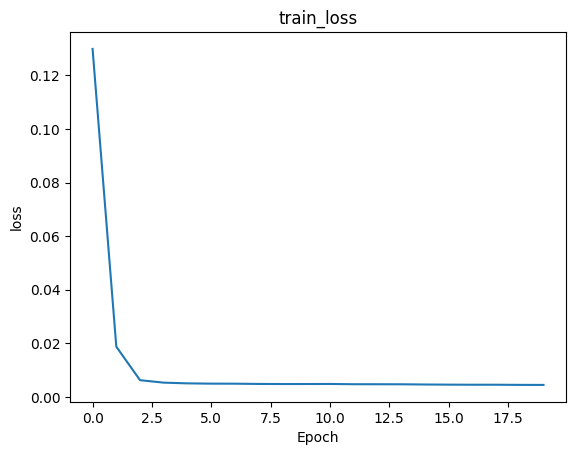

In [5]:
#%%
# Adding the GRU layer
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Dropout
n_steps = 30
n_features = 5
model = Sequential()
#model.add(LSTM(50,activation='relu', return_sequences=False, input_shape = (n_steps, n_features)))
model.add(GRU(50,activation='relu', return_sequences=False, input_shape = (n_steps, n_features)))
#input_shape = (n_steps, n_features)  幾步, 幾個特徵
# return_sequences預設false，輸出是否為序列? 是: 輸出多個值
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse' , metrics=['mse','mape'])
#%%
history = model.fit(X,y,batch_size=100,epochs=20)
#%%
# 顯示loss
import matplotlib.pyplot as plt

plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot(history.history["loss"])

In [ ]:
#%%
#製造X跟Y(RD)
import tqdm
n = 30 #改n即可，資料1/4起，所以能預測的第一個Y為2/3，抓30天
feature_names = list(test.drop('RD', axis=1).columns)
X = []
y = []
indexes = []
norm_data_x = test[feature_names]
for i in tqdm.tqdm_notebook(range(0,len(test)-n)):
  X.append(norm_data_x.iloc[i:i+n].values)
  y.append(test['RD'].iloc[i+n-1]) #現有資料+30天的Y
  indexes.append(test.index[i+n-1]) #Y的日期
X=np.array(X) # RD外的6個自變量，記憶體=30，EX:預測12/31的Y，用12/1~12/30的X
y=np.array(y)

predictions = model.predict(X)
predictions = pd.DataFrame(predictions).rename(columns={0: '預測值'})
Y_test = pd.DataFrame(y).rename(columns={0: '實際值'})

final = pd.concat([predictions,Y_test],axis=1)
final['mae'] = abs(final['預測值'] - final['實際值'])
final

<ipython-input-7-db850fb90dcb>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(0,len(test)-n)):


  0%|          | 0/3 [00:00<?, ?it/s]

1/1 [==============================] - 0s 84ms/step


,預測值,實際值,mae
0,0.513690,0.202381,0.311309
1,0.512527,0.000000,0.512527
2,0.513900,0.378307,0.135593
